### 11_Find the optimal number of clusters using elbow method.
Gayantha R. L. Kodikata @UWM 10/06/2024

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt

In [2]:
# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()
img_ds = gdal.Open('TuffBed_0298_DLS_IDX_5B.tif', gdal.GA_ReadOnly)

In [3]:
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
              gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

In [5]:
for b in range(img.shape[2]):
    img[:,:,b] = img_ds.GetRasterBand(b+1).ReadAsArray()

new_shape = (img.shape[0] * img.shape[1], img.shape[2])
print(img.shape)
print(new_shape)
X = img[:,:,:5].reshape(new_shape)
print(X.shape)

(900, 1200, 5)
(1080000, 5)
(1080000, 5)


<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

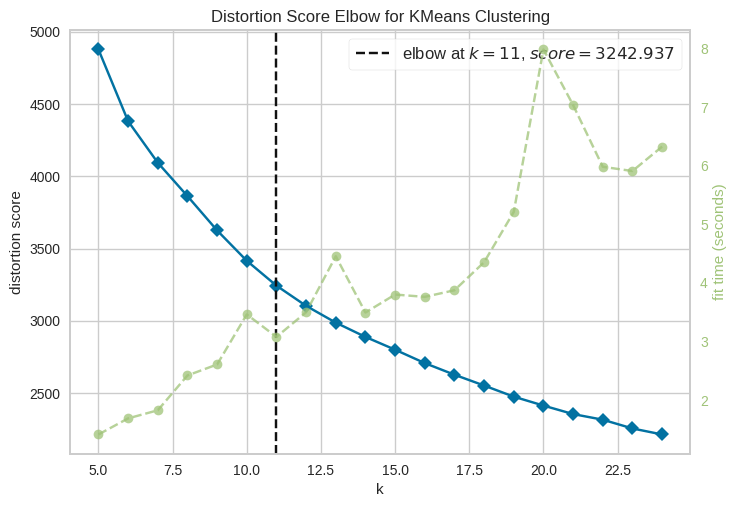

In [7]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(5,25))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show(outpath= 'TuffBed_0298_DLS_IDX_5B_Elbow.png')        # Finalize and render the figure